In [39]:
#task 1 

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [41]:
#Read Datasets using Pandas
df = pd.read_csv('CAR Price Dataset.csv')

df.head() # Display Datasets From Top 

df.columns # Displaying All Columns Name

# Checking missing values in each column 
df.isnull().sum()

df.info() # summary of the DataFrame

# Get summary for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [42]:
# List of numerical columns 
numerical_cols = ['selling_price', 'km_driven']

# Loop through the numerical columns and check for unusual (non-numeric) values
for col in numerical_cols:
    # Convert the column to numeric, invalid parsing will be set as NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Check for rows with NaN values (which indicates invalid data)
    unusual_values = df[df[col].isna()]
    
    # Print the rows that contain invalid values
    if not unusual_values.empty:
        print(f"Unusual values in column '{col}':")
        print(unusual_values)
        
    else:
        print(f'NO Unusual values in {col}')

NO Unusual values in selling_price
NO Unusual values in km_driven


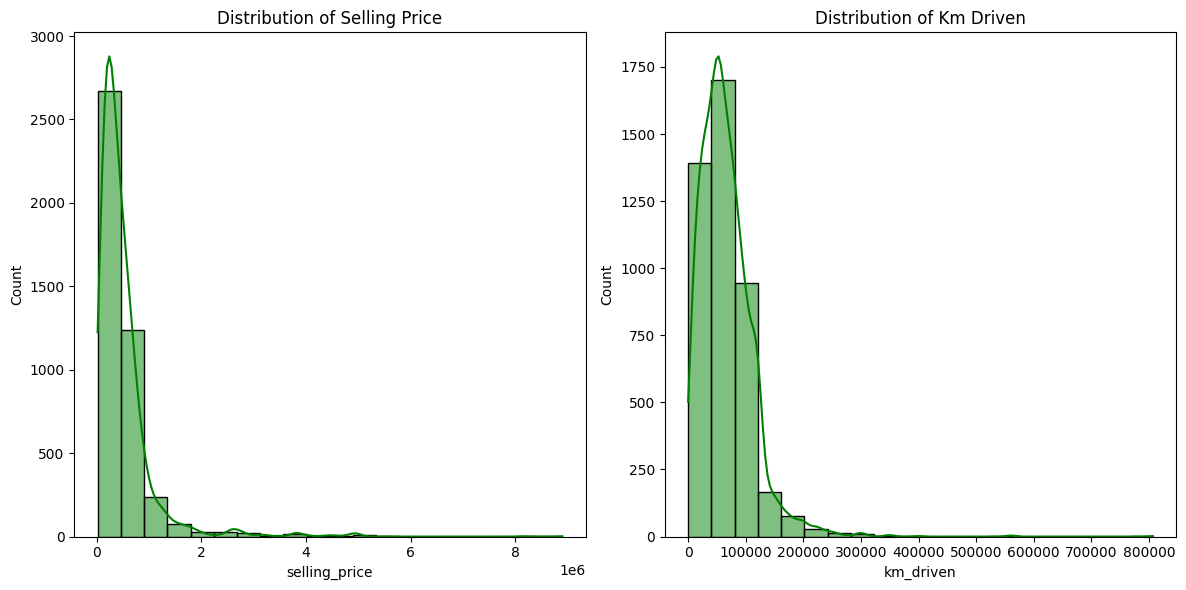

In [43]:
# Set up a figure with subplots 
plt.figure(figsize=(12, 6))

# Plot for selling_price
plt.subplot(1, 2, 1)  # In same row and first column
sns.histplot(df['selling_price'], bins=20, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Selling Price')

# Plot for km_driven
plt.subplot(1, 2, 2) # same row second column
sns.histplot(df['km_driven'], bins=20, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Km Driven')

plt.tight_layout()

# Show the plot
plt.show()

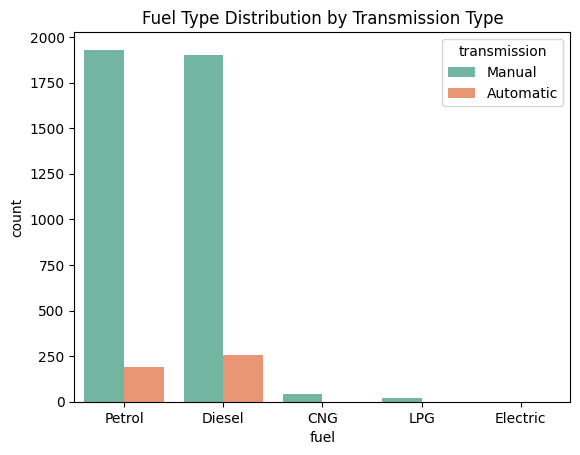

In [44]:
# Visualize Fuel Type Distribution 
sns.countplot(data=df, x='fuel', hue='transmission',  palette='Set2')
plt.title('Fuel Type Distribution by Transmission Type')
plt.show()

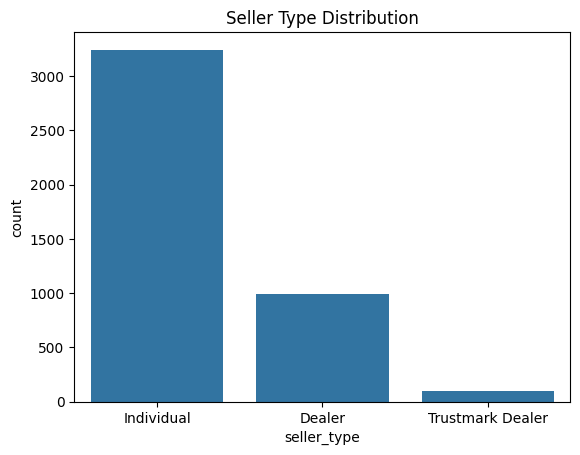

In [45]:
sns.countplot(data=df, x='seller_type')
plt.title('Seller Type Distribution')
plt.show()

In [46]:
import plotly.graph_objects as go

# Ensure the 'year' column is numeric
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

# Scatter plot with plotly
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter(
    x=df['year'], 
    y=df['selling_price'], 
    mode='markers',  # Only markers
    marker=dict(color='blue', opacity=0.6, size=8),  # Styling markers
    name='Data points'  # Label for the data points
))

# Fit a linear regression (line of best fit) using NumPy
slope, intercept = np.polyfit(df['year'], df['selling_price'], 1)
line = slope * df['year'] + intercept  # Calculate the line of best fit

# Add the line of best fit
fig.add_trace(go.Scatter(
    x=df['year'], 
    y=line,  # The regression line
    mode='lines',  # Line mode (no markers)
    line=dict(color='red', width=2),  # Red line of best fit
    name='Line of Best Fit'  # Label for the line
))

# Update layout with titles and labels
fig.update_layout(
    title='Selling Price Over Time',
    xaxis_title='Year',
    yaxis_title='Selling Price',
    template='plotly_dark',  # Dark background (optional)
    hovermode='closest'  # Show data points when hovering
)
# Show the plot
fig.show()

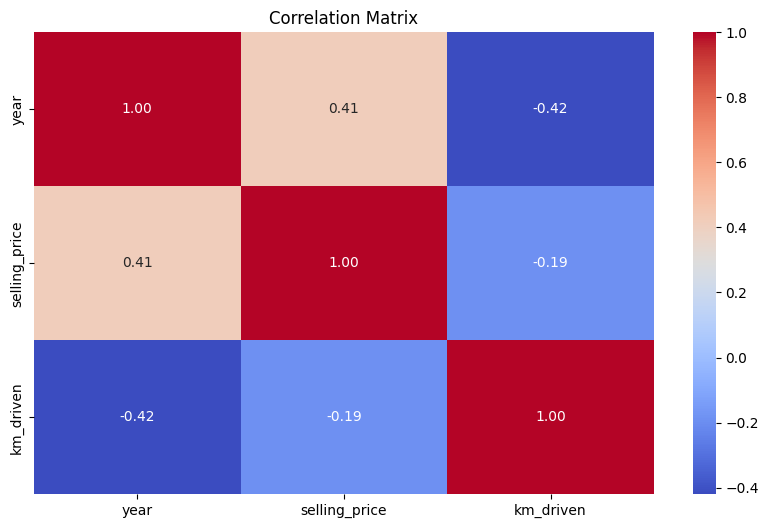

In [47]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [48]:
# Feature engineering: Create new columns

df['car_age'] = 2025 - df['year']

# Log transform of km_driven (reduce skew)
df['log_km_driven'] = np.log1p(df['km_driven'])  # log1p prevents issues with 0 values

# Kilometers per year (usage intensity)
df['km_per_year'] = df['km_driven'] / (df['car_age'] + 1)  # +1 avoids division by zero


In [49]:
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [50]:
# One-Hot Encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)  # Ensure output is a dense array

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[['owner','fuel', 'seller_type', 'transmission']])

# Convert the encoded data into a DataFrame for easier readability
encoded_columns = encoder.get_feature_names_out(['owner','fuel', 'seller_type', 'transmission'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

df_encoded = pd.concat([
    df[['year',
        'selling_price',
        'km_driven',
        'car_age',
        'log_km_driven',
        'km_per_year']],
    encoded_df
], axis=1)

# Convert Boolean values to integers
df_encoded = df_encoded.astype({col: 'int' for col in encoded_df.columns})

df_encoded

,year,selling_price,km_driven,car_age,log_km_driven,km_per_year,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,...,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2007,60000,70000,18,11.156265,3684.210526,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,2007,135000,50000,18,10.819798,2631.578947,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2012,600000,100000,13,11.512935,7142.857143,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,2017,250000,46000,8,10.736418,5111.111111,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,2014,450000,141000,11,11.856522,11750.000000,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,11,11.289794,6666.666667,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
4336,2014,409999,80000,11,11.289794,6666.666667,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
4337,2009,110000,83000,16,11.326608,4882.352941,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
4338,2016,865000,90000,9,11.407576,9000.000000,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [51]:
# Using StandardScaler to scale the features

numerical_cols_to_scale = [
    'km_driven', 'car_age',
    'log_km_driven', 'km_per_year'
]

scaler = StandardScaler()
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])

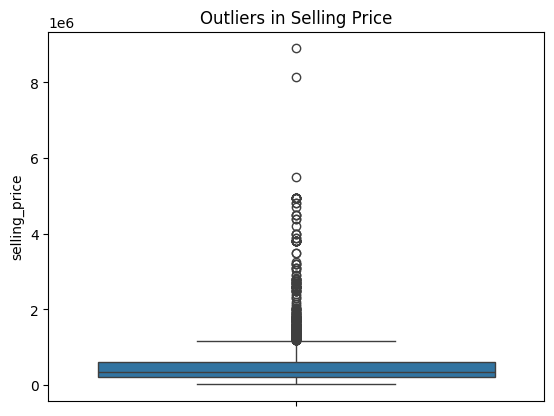

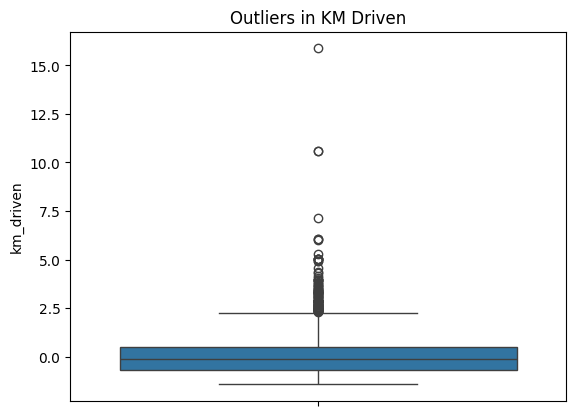

In [52]:
# Visualize numerical columns for outliers using boxplots
sns.boxplot(data=df_encoded['selling_price'])
plt.title('Outliers in Selling Price')
plt.show()

sns.boxplot(data=df_encoded['km_driven'])
plt.title('Outliers in KM Driven')
plt.show()

In [53]:
from scipy import stats

z_scores = np.abs(stats.zscore(df_encoded[numerical_cols_to_scale]))
df_no_outliers = df_encoded[(z_scores < 3).all(axis=1)]

print("Shape before outlier removal:", df_encoded.shape)
print("Shape after outlier removal:", df_no_outliers.shape)

Shape before outlier removal: (4340, 21)
Shape after outlier removal: (4155, 21)


In [54]:
# Split the data into features (X) and target (y)
X = df_no_outliers.drop(columns=['selling_price'])
y = df_no_outliers['selling_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (3324, 20)
Test data shape: (831, 20)


In [55]:
#Task 2 

In [56]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
from sklearn.exceptions import ConvergenceWarning

In [57]:
#models 

lin_reg = LinearRegression()

rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

lasso_model = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('lasso', Lasso(alpha=0.1, max_iter=50000, random_state=42))
])


models = {
    "LinearRegression": lin_reg,
    "RandomForest": rf_model,
    "Lasso": lasso_model
}

models

{'LinearRegression': LinearRegression(),
 'RandomForest': RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42),
 'Lasso': Pipeline(steps=[('scaler', StandardScaler()),
                 ('lasso', Lasso(alpha=0.1, max_iter=50000, random_state=42))])}

In [58]:
# Cross-Validation

k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=42)

scoring = {
    "rmse": "neg_root_mean_squared_error",
    "mae": "neg_mean_absolute_error",
    "r2": "r2"
}

cv_results = []

for name, model in models.items():
    print(f"\n Cross-validation for: {name}")
    
    scores = cross_validate(
        estimator=model,
        X=X,
        y=y,
        cv=cv,
        scoring=scoring,
        return_train_score=False
    )
    
    cv_results.append({
        "model": name,
        "cv_rmse_mean": -scores["test_rmse"].mean(),
        "cv_rmse_std": scores["test_rmse"].std(),
        "cv_mae_mean": -scores["test_mae"].mean(),
        "cv_mae_std": scores["test_mae"].std(),
        "cv_r2_mean": scores["test_r2"].mean(),
        "cv_r2_std": scores["test_r2"].std()
    })

cv_results_df = pd.DataFrame(cv_results)
cv_results_df


 Cross-validation for: LinearRegression

 Cross-validation for: RandomForest

 Cross-validation for: Lasso


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.850e+11, tolerance: 1.140e+11

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.794e+11, tolerance: 1.095e+11

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

,model,cv_rmse_mean,cv_rmse_std,cv_mae_mean,cv_mae_std,cv_r2_mean,cv_r2_std
0,LinearRegression,425534.338050,29722.092919,230707.708628,8610.763313,0.464392,0.055115
1,RandomForest,345507.407173,38252.822943,162685.061324,9555.511799,0.645200,0.066710
2,Lasso,425497.236122,29773.699678,230685.673897,8612.442772,0.464478,0.055253


In [59]:
# task 3 

In [60]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [61]:
X = df_no_outliers.drop(columns=['selling_price'])
y = df_no_outliers['selling_price']

In [62]:
# Base model for RFE
lr = LinearRegression()

# features to keep
n_features_to_select = 10  

rfe = RFE(estimator=lr, n_features_to_select=n_features_to_select)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
feature_ranking = pd.DataFrame({
    'feature': X.columns,
    'ranking': rfe.ranking_,
    'selected': rfe.support_
})

selected_features, feature_ranking.sort_values('ranking')

(Index(['km_driven', 'log_km_driven', 'km_per_year', 'fuel_Diesel',
        'fuel_Electric', 'fuel_LPG', 'seller_type_Individual',
        'seller_type_Trustmark Dealer', 'transmission_Automatic',
        'transmission_Manual'],
       dtype='object'),
                          feature  ranking  selected
 19           transmission_Manual        1      True
 1                      km_driven        1      True
 17  seller_type_Trustmark Dealer        1      True
 3                  log_km_driven        1      True
 4                    km_per_year        1      True
 16        seller_type_Individual        1      True
 18        transmission_Automatic        1      True
 11                   fuel_Diesel        1      True
 12                 fuel_Electric        1      True
 13                      fuel_LPG        1      True
 8           owner_Test Drive Car        2     False
 10                      fuel_CNG        3     False
 14                   fuel_Petrol        4     False
 15  

/var/folders/_m/7lg7zk511010t1vjtvb9w9hr0000gt/T/ipykernel_54249/1703825666.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




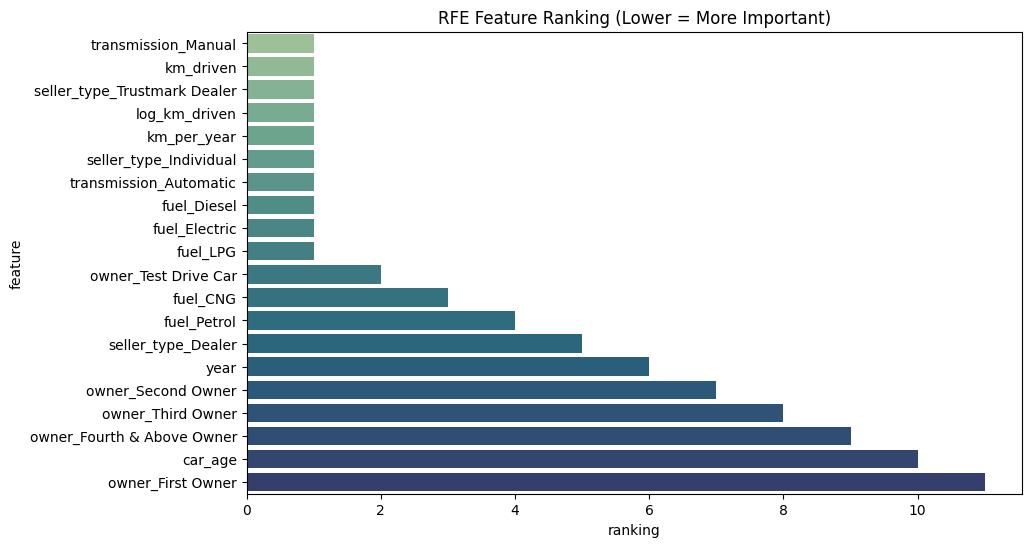

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=feature_ranking.sort_values('ranking'),
    x='ranking',
    y='feature',
    palette='crest'
)
plt.title('RFE Feature Ranking (Lower = More Important)')
plt.show()

In [64]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE: 324131.70485688077


In [65]:
# feature importances from tuned RF
importances = best_rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

importance_df

,feature,importance
19,transmission_Manual,0.179302
18,transmission_Automatic,0.153844
11,fuel_Diesel,0.122492
0,year,0.112213
2,car_age,0.108158
4,km_per_year,0.094339
1,km_driven,0.070956
3,log_km_driven,0.069964
15,seller_type_Dealer,0.032639
16,seller_type_Individual,0.022759


/var/folders/_m/7lg7zk511010t1vjtvb9w9hr0000gt/T/ipykernel_54249/4098896527.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




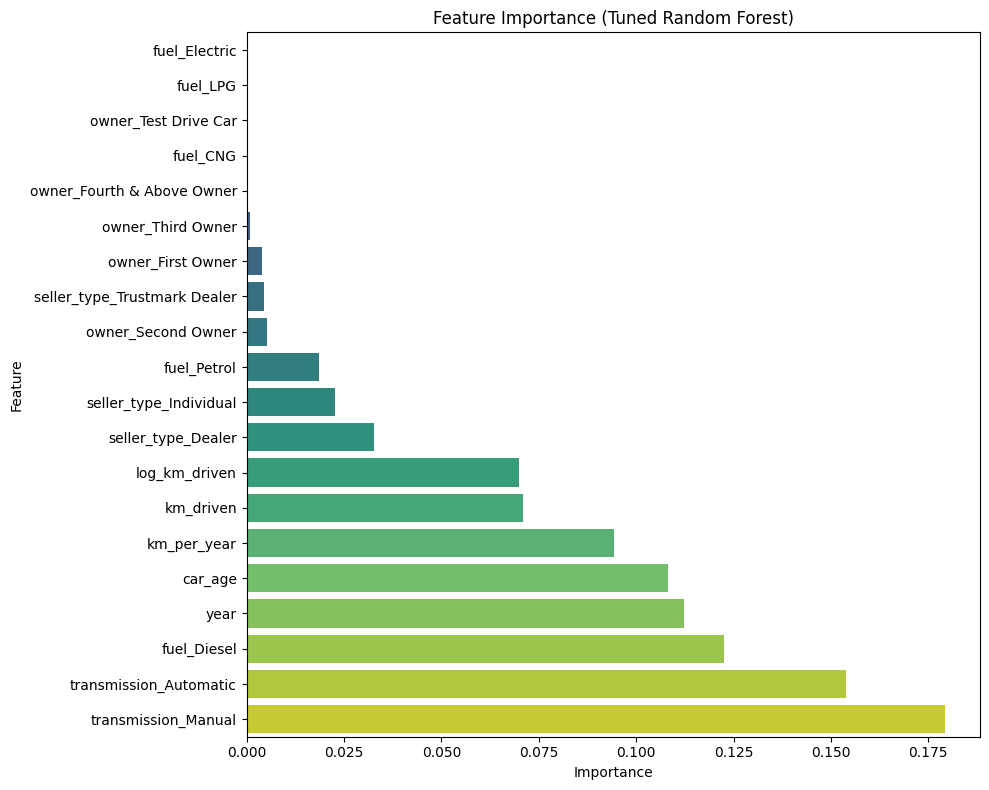

In [66]:
# Sort by importance
plot_df = importance_df.sort_values(by='importance', ascending=True)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=plot_df,
    x='importance',
    y='feature',
    palette='viridis'
)

plt.title('Feature Importance (Tuned Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [67]:
alpha_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

lasso = Lasso(max_iter=10000, random_state=42)

grid_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=alpha_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',  # tune for lowest RMSE
    n_jobs=-1,
    verbose=0
)

# Fit grid search
grid_lasso.fit(X, y)

print("Best alpha:", grid_lasso.best_params_['alpha'])
print("Best RMSE (CV):", -grid_lasso.best_score_)

best_lasso = grid_lasso.best_estimator_

# Evaluate with multiple metrics
cv = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = -cross_val_score(best_lasso, X, y, cv=cv,
                               scoring='neg_root_mean_squared_error')
mae_scores = -cross_val_score(best_lasso, X, y, cv=cv,
                              scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(best_lasso, X, y, cv=cv,
                            scoring='r2')

lasso_results = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R2'],
    'mean': [rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()],
    'std': [rmse_scores.std(), mae_scores.std(), r2_scores.std()]
})

lasso_results

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.901e+14, tolerance: 1.247e+11
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.774e+14, tolerance: 1.144e+11
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Best alpha: 100
Best RMSE (CV): 425501.27804341447


,metric,mean,std
0,RMSE,425487.242401,29817.005591
1,MAE,230567.240782,8604.604811
2,R2,0.464509,0.055276


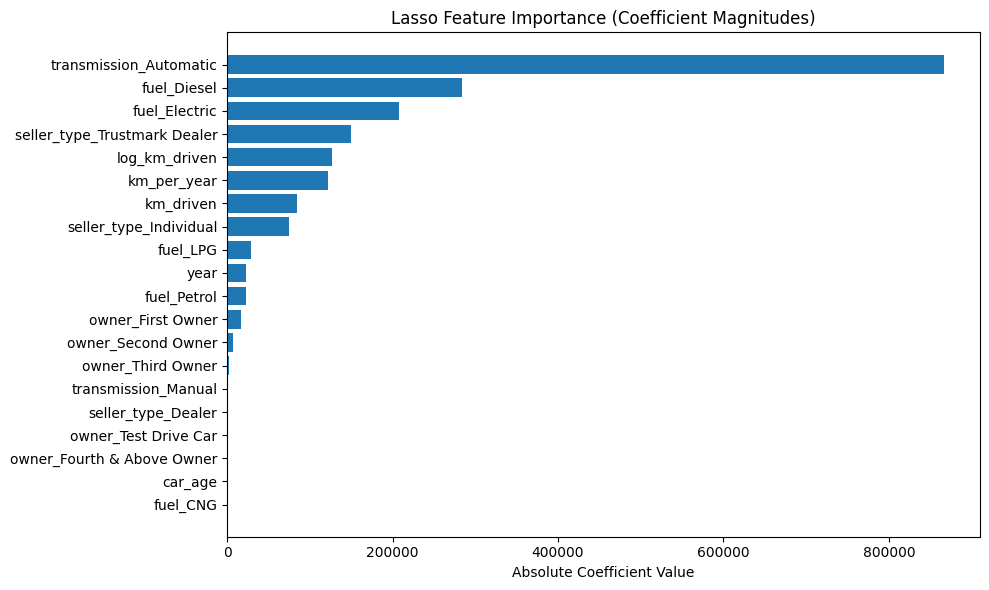

In [68]:
coef = best_lasso.coef_

lasso_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(coef)  # absolute values since coefficients can be negative
})

lasso_importance = lasso_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(lasso_importance['feature'], lasso_importance['importance'])
plt.xlabel("Absolute Coefficient Value")
plt.title("Lasso Feature Importance (Coefficient Magnitudes)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [69]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    f"Lasso (alpha={grid_lasso.best_params_['alpha']})": best_lasso,
    "Random Forest (tuned)": best_rf
}

rows = []

for name, model in models.items():
    rmse = -cross_val_score(model, X, y, cv=cv,
                            scoring='neg_root_mean_squared_error')
    mae = -cross_val_score(model, X, y, cv=cv,
                           scoring='neg_mean_absolute_error')
    r2 = cross_val_score(model, X, y, cv=cv,
                         scoring='r2')
    
    rows.append({
        "model": name,
        "cv_RMSE_mean": rmse.mean(),
        "cv_RMSE_std": rmse.std(),
        "cv_MAE_mean": mae.mean(),
        "cv_MAE_std": mae.std(),
        "cv_R2_mean": r2.mean(),
        "cv_R2_std": r2.std()
    })

comparison_df = pd.DataFrame(rows)
comparison_df

,model,cv_RMSE_mean,cv_RMSE_std,cv_MAE_mean,cv_MAE_std,cv_R2_mean,cv_R2_std
0,Linear Regression,425534.338050,29722.092919,230707.708628,8610.763313,0.464392,0.055115
1,Lasso (alpha=100),425487.242401,29817.005591,230567.240782,8604.604811,0.464509,0.055276
2,Random Forest (tuned),339483.254334,36521.983645,164789.341833,10106.734958,0.657979,0.061674


Tuned Random Forest – Test Set Performance
Test RMSE: 300,039.12
Test MAE:  165,062.19
Test R²:   0.7273


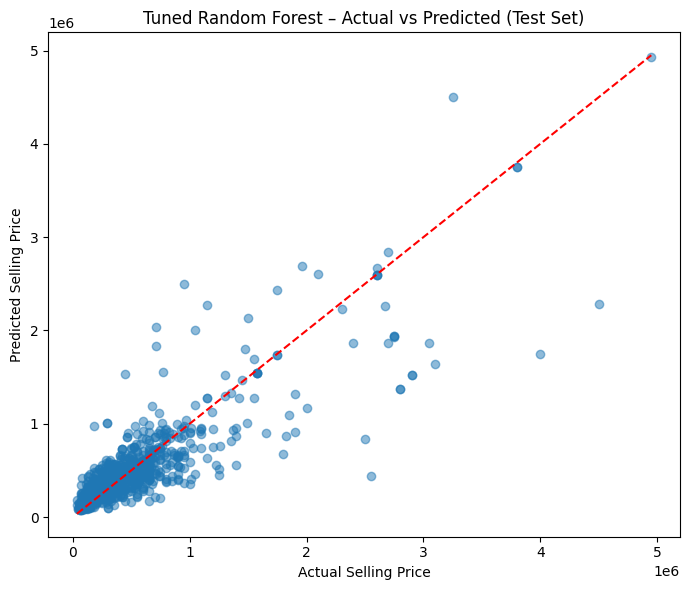

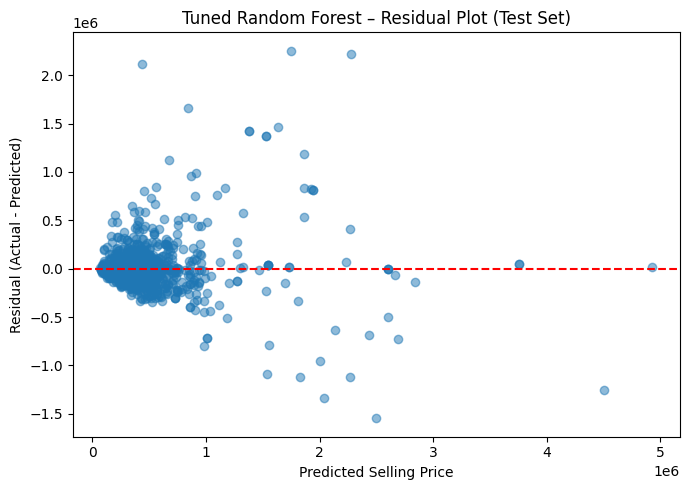

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Tuned Random Forest – Test Set Performance")
print(f"Test RMSE: {test_rmse:,.2f}")
print(f"Test MAE:  {test_mae:,.2f}")
print(f"Test R²:   {test_r2:.4f}")

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Tuned Random Forest – Actual vs Predicted (Test Set)")


max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.tight_layout()
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Selling Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Tuned Random Forest – Residual Plot (Test Set)")
plt.tight_layout()
plt.show()
